TESTED FEATURES: 
Index(['fullTime', 'FullK', 'diffKD', 'OB', 'OS', 'vol', 's15', 's30', 's60',
       'ToD', 'perc30', 'perc60', 'percD', 'RSI', 'Wpercent', 'acc'],
      dtype='object')
TESTING FOR: 
bull15
Epoch 1/50


c:\Users\logan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8959 - loss: 0.6417 - val_accuracy: 0.8884 - val_loss: 0.5175
Epoch 2/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9023 - loss: 0.4810 - val_accuracy: 0.8884 - val_loss: 0.4264
Epoch 3/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8996 - loss: 0.4009 - val_accuracy: 0.8884 - val_loss: 0.3819
Epoch 4/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8983 - loss: 0.3612 - val_accuracy: 0.8884 - val_loss: 0.3613
Epoch 5/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9027 - loss: 0.3346 - val_accuracy: 0.8884 - val_loss: 0.3531
Epoch 6/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9030 - loss: 0.3248 - val_accuracy: 0.8884 - val_loss: 0.3504
Epoch 7/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9031 - loss: 0.3206 - val_accuracy: 0.8884 - val_loss: 0.3499
Epoch 8/50
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8966 - loss: 0.3327 - val_accurac

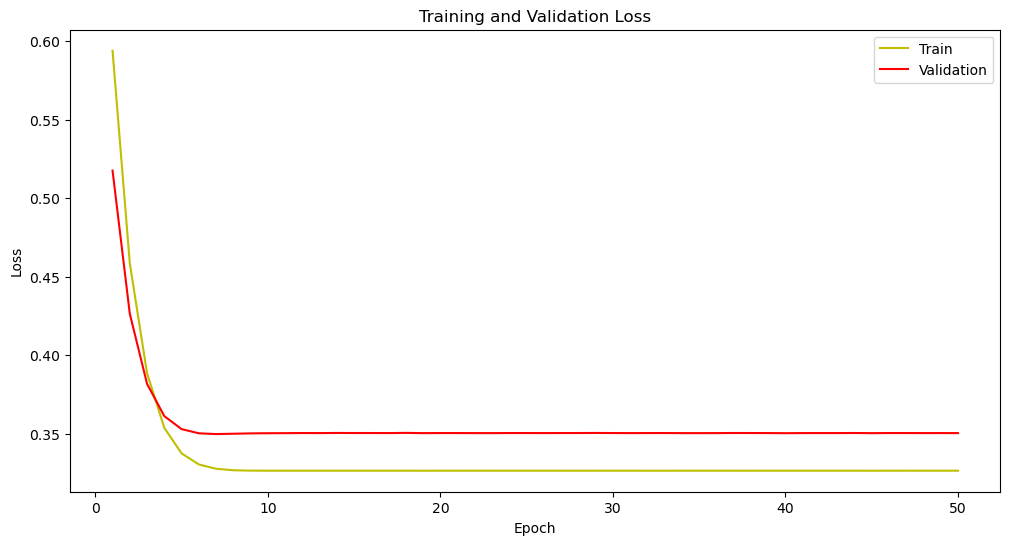

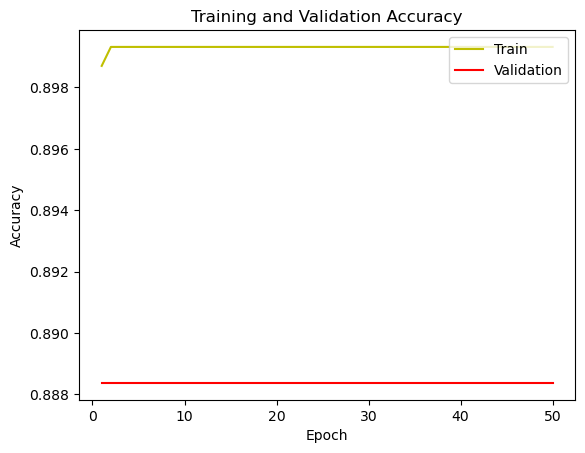

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


<Axes: >

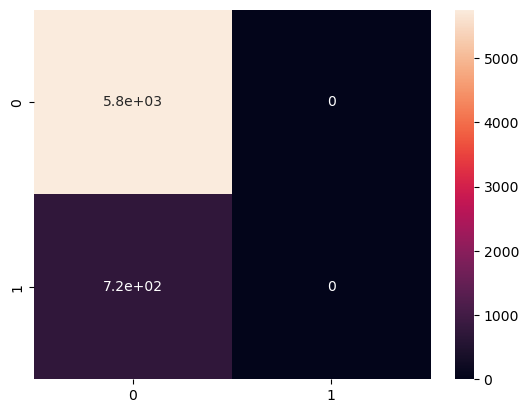

In [12]:
#JJ McCauley + LOGAN KELSCH 
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.initializers import GlorotUniform

tf.config.experimental.set_memory_growth

#LOAD DATA FROM CSV-------------------------------------------------------

# Load the dataset
data = pd.read_csv('ES5m90dCLASS.csv')


#testing random feature drops
#data = data.drop(columns='fullTime')
#data = data.drop(columns='FullK')
#data = data.drop(columns='diffKD')
#data = data.drop(columns='OB')
#data = data.drop(columns='OS')
#data = data.drop(columns='vol')
#data = data.drop(columns='s15')
#data = data.drop(columns='s30')
#data = data.drop(columns='s60')
#data = data.drop(columns='ToD')
#data = data.drop(columns='perc30')
#data = data.drop(columns='perc60')
#data = data.drop(columns='percD')
#data = data.drop(columns='RSI')
#data = data.drop(columns='Wpercent')
#data = data.drop(columns='acc')

#TEMP DROP PRE-DUAL-OUTPUT NN

#data = data.drop(columns='bull15')
data = data.drop(columns='bear15')

data = data.drop(columns='bull30')
data = data.drop(columns='bear30')

data = data.drop(columns='bull60')
data = data.drop(columns='bear60')

#confirming X and Y features post training
Xfeatures = data.columns[:-1]
Yfeatures = data.columns[-1]
print("TESTED FEATURES: ")
print(Xfeatures)
print("TESTING FOR: ")
print(Yfeatures)

#PROCESS THE DATA-------------------------------------------------------

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#Encoding data
labelencoder = LabelBinarizer()
y = labelencoder.fit_transform(y)

# Standardize the features
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



#BUILD THE NEURAL NETWORK MODEL-------------------------------------------------------


opt1 = SGD(learning_rate=0.01)
opt2  = tf.keras.optimizers.Adam(clipnorm=0.7)

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=16, activation='relu'),#, kernel_initializer=GlorotUniform()),
        tf.keras.layers.Dropout(0.8),      
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    rmse='root_mean_squared_error'

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#TRAIN THE MODEL WITH CUSTOMIZABLE EPOCHS-------------------------------------------------------

epochs = 50

model = build_model()
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

#EVALUATE THE MODEL AND VISUALIZE RESULTS-------------------------------------------------------

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

# Plot training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#making a confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

# Save the model
#model.save('my_model.keras')
# Load the model
#loaded_model = tf.keras.models.load_model('my_model.keras')

In [10]:
''' Testing outputs for model (placed here so we don't have to retrain)'''
preds = model.predict(X_train)
print(preds[0:5])
print(preds[10000:10005])

model.summary()


608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
[[0.1004618]
 [0.1004618]
 [0.1004618]
 [0.1004618]
 [0.1004618]]
[[0.1004618]
 [0.1004618]
 [0.1004618]
 [0.1004618]
 [0.1004618]]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733 (6.77 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,156 (4.52 KB)